## Customer Segmention using K-means Clustering 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
import seaborn as sns 

In [3]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
X = df[['Annual Income (k$)','Spending Score (1-100)']]

In [6]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import joblib

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [8]:
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

c:\Users\chilesh\miniconda3\envs\newenv\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\chilesh\miniconda3\envs\newenv\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\chilesh\miniconda3\envs\newenv\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\chilesh\miniconda3\envs\newenv\lib\site-packages\sklearn\cluster\_kmeans.py:1419: 

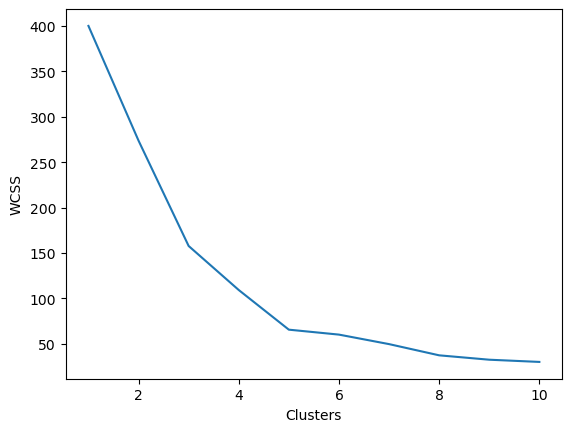

In [9]:
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.xlabel("Clusters")
plt.ylabel("WCSS")
plt.show()


In [10]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

df['Cluster'] = clusters


c:\Users\chilesh\miniconda3\envs\newenv\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


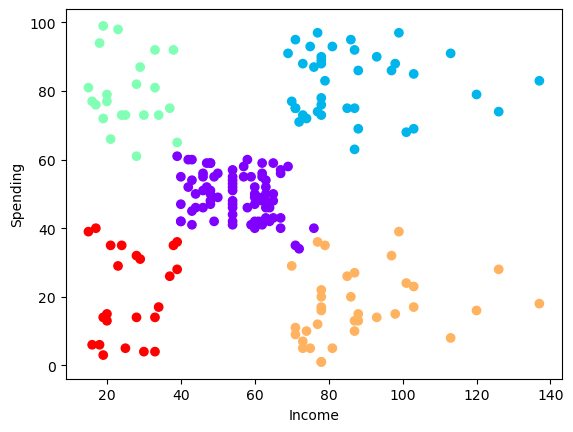

In [11]:
plt.scatter(df['Annual Income (k$)'],
            df['Spending Score (1-100)'],
            c=df['Cluster'],
            cmap='rainbow')

plt.xlabel("Income")
plt.ylabel("Spending")
plt.show()


In [12]:
joblib.dump(kmeans, "kmeans_model.pkl")


['kmeans_model.pkl']